A

In [14]:
import pandas as pd

review_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Amazon_Yelp_Reviews/Review_Data.csv")
review_data.sample(10)

,Id,Review,Sentiment
1748,1749,"I have watched their prices inflate, portions ...",0
527,528,The noise shield is incrediable.,1
940,941,A lot of websites have been rating this a very...,1
1203,1204,Great brunch spot.,1
1548,1549,The desserts were a bit strange.,0
1222,1223,"Lobster Bisque, Bussell Sprouts, Risotto, File...",0
414,415,After a year the battery went completely dead ...,0
1882,1883,We definately enjoyed ourselves.,1
1288,1289,This place is amazing!,1
1016,1017,Highly recommended.,1


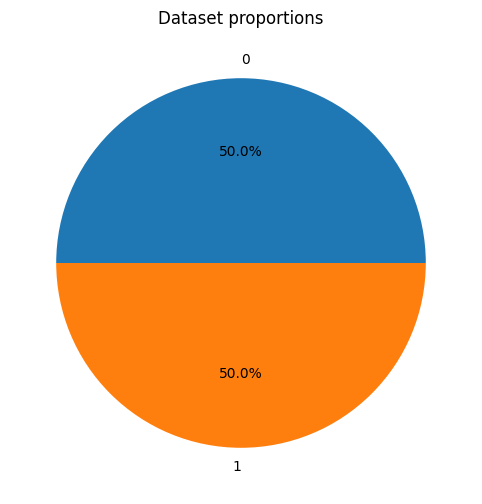

In [15]:
## add pie chart of data representation 
import numpy as np
import matplotlib.pyplot as plt
labels, counts = np.unique(review_data.Sentiment, return_counts=True)

plt.figure(figsize=(8, 6))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [16]:
review_data.isnull().sum() #if any null value will remove that review row


Id           0
Review       0
Sentiment    0
dtype: int64

In [17]:
#contains emoji or not 
import re

def contains_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Example usage with a DataFrame
import pandas as pd

review_data["Review"].apply(contains_emoji).unique()


array([False])

In [18]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
import re
import contractions

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to expand contractions using the 'contractions' library
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean text
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    return text

# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

def preprocessing(data, text_col):
    # Convert to lowercase
    data[text_col + '_lowcase'] = data[text_col].str.lower()
    
    # Expand contractions
    data[text_col + '_expanded'] = data[text_col + '_lowcase'].apply(expand_contractions)
    
    # Clean text
    data[text_col + '_cleaned'] = data[text_col + '_expanded'].apply(clean_text)
    
    # Tokenize words and remove stopwords
    data[text_col + '_word_tokens'] = data[text_col + '_cleaned'].apply(word_tokenize)
    data[text_col + '_without_stopwords'] = data[text_col + '_word_tokens'].apply(lambda x: [t for t in x if t not in spacy_stopwords])
    
    # Join tokens back to string
    data[text_col + '_Final_text'] = data[text_col + '_without_stopwords'].apply(lambda x: ' '.join(x))
    
    # Lemmatize text
    data[text_col + '_Final_text'] = data[text_col + '_Final_text'].apply(lemmatize_text)
    
    return data





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\annun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
preprocessing(review_data, 'Review')
review_data.head()



,Id,Review,Sentiment,Review_lowcase,Review_expanded,Review_cleaned,Review_word_tokens,Review_without_stopwords,Review_Final_text
0,1,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...","[way, plug, converter]",way plug converter
1,2,"Good case, Excellent value.",1,"good case, excellent value.","good case, excellent value.",good case excellent value,"[good, case, excellent, value]","[good, case, excellent, value]",good case excellent value
2,3,Great for the jawbone.,1,great for the jawbone.,great for the jawbone.,great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]",great jawbone
3,4,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, minute...",tie charger conversation last minutesmajor pro...
4,5,The mic is great.,1,the mic is great.,the mic is great.,the mic is great,"[the, mic, is, great]","[mic, great]",mic great


In [32]:
review_data.iloc[664]

Id                                                                665
Review                            Does everything it should and more.
Sentiment                                                           1
Review_lowcase                    does everything it should and more.
Review_expanded                   does everything it should and more.
Review_cleaned                     does everything it should and more
Review_word_tokens          [does, everything, it, should, and, more]
Review_without_stopwords                                           []
Review_Final_text                                                    
Name: 664, dtype: object

In [54]:
(review_data['Review_Final_text'] == '').sum()

0

In [55]:
review_data['Review_Final_text'].isna().sum()

0

In [56]:
review_data['Review_Final_text'].isnull().sum()

0

In [57]:
(review_data['Review_Final_text'].str.strip() == '').sum()


0

In [58]:
review_data['Review_Final_text'].replace('', float('nan'), inplace=True)
review_data.dropna(subset=['Review_Final_text'], inplace=True)


In [59]:
review_data

,Id,Review,Sentiment,Review_lowcase,Review_expanded,Review_cleaned,Review_word_tokens,Review_without_stopwords,Review_Final_text
0,1,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...","[way, plug, converter]",way plug converter
1,2,"Good case, Excellent value.",1,"good case, excellent value.","good case, excellent value.",good case excellent value,"[good, case, excellent, value]","[good, case, excellent, value]",good case excellent value
2,3,Great for the jawbone.,1,great for the jawbone.,great for the jawbone.,great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]",great jawbone
3,4,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, minute...",tie charger conversation last minutesmajor pro...
4,5,The mic is great.,1,the mic is great.,the mic is great.,the mic is great,"[the, mic, is, great]","[mic, great]",mic great
...,...,...,...,...,...,...,...,...,...
1995,1996,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...,i think food should have flavor and texture an...,i think food should have flavor and texture an...,"[i, think, food, should, have, flavor, and, te...","[think, food, flavor, texture, lacking]",think food flavor texture lack
1996,1997,Appetite instantly gone.,0,appetite instantly gone.,appetite instantly gone.,appetite instantly gone,"[appetite, instantly, gone]","[appetite, instantly, gone]",appetite instantly go
1997,1998,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go b...,overall i was not impressed and would not go b...,overall i was not impressed and would not go back,"[overall, i, was, not, impressed, and, would, ...","[overall, impressed]",overall impressed
1998,1999,"The whole experience was underwhelming, and I ...",0,"the whole experience was underwhelming, and i ...","the whole experience was underwhelming, and i ...",the whole experience was underwhelming and i t...,"[the, whole, experience, was, underwhelming, a...","[experience, underwhelming, think, ninja, sush...",experience underwhelming think ninja sushi time


In [46]:
file_path = r'C:\Users\annun\Documents\programes\OJT\preprocessed_data.csv'
review_data.to_csv(file_path, index=False)

## word cloud

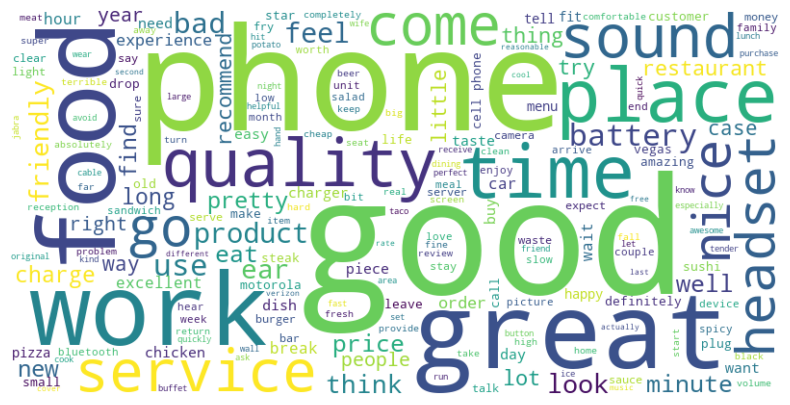

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for_word_cloud="".join(review_data['Review_Final_text'])



# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(for_word_cloud)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## converting DTM 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance
vectorizer = CountVectorizer(min_df =2)

# Fit and transform the preprocessed documents
dtm = vectorizer.fit_transform(review_data['Review_Final_text'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Create the DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=terms)



# Display the DataFrame
dtm_df.head()

,ability,able,absolutely,accept,access,acknowledge,activate,actually,adapter,add,...,worst,worth,worthless,worthwhile,wow,wrap,wrong,year,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
review_data['Sentiment'].value_counts()

Sentiment
1    996
0    987
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X = dtm_df

y = review_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)



## Naive Bayes Model

In [50]:
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()
senti_model.fit(X_train, y_train)

MultinomialNB()

In [51]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.8959646910466582
Test Accuracy 0.7732997481108312


In [78]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predictions on the training set
train_predict = senti_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_predict = senti_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)



Training Set Confusion Matrix:
[[665 123]
 [ 61 751]]
Training Set Accuracy: 0.885

Test Set Confusion Matrix:
[[166  46]
 [ 26 162]]
Test Set Accuracy: 0.82


In [67]:
import os
current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: C:\Users\annun\Documents\programes\OJT


In [79]:
import joblib

# Save the vectorizer
joblib.dump(vectorizer, r'C:\Users\annun\Documents\programes\OJT\vectorizer.pkl')


# Save the model
joblib.dump(senti_model, r'C:\Users\annun\Documents\programes\OJT\senti_model.pkl')

['C:\\Users\\annun\\Documents\\programes\\OJT\\senti_model.pkl']

In [87]:
import joblib
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define new reviews
t1 = "This product is bad."
t2 = "I recently bought this product and I'm absolutely delighted with it! The quality is top-notch and it exceeded all my expectations. I highly recommend it to anyone looking for a reliable solution.."
t3 = "This restaurant is super good. I am a big fan of their menu."
new_reviews = [t1, t2, t3]

# Create a DataFrame for new reviews
new_comment = pd.DataFrame({"text": new_reviews})

# Preprocess the new comments
preprocessing(new_comment, 'text')

# Load the pre-trained vectorizer and model
vectorizer = joblib.load('vectorizer.pkl')
senti_model = joblib.load('senti_model.pkl')

# Transform the preprocessed text data into a Document-Term Matrix (DTM)
dtm_new_comment = vectorizer.transform(new_comment["text"])

# Predict sentiment using the trained model
predicted_sentiment = senti_model.predict(dtm_new_comment)

# Print the predicted sentiment for each text
for text, label in zip(new_comment["text"], predicted_sentiment):
    print(f"Text: {text}\nPredicted Sentiment: {label}")


Text: this product is bad.
Predicted Sentiment: 0
Text: i recently bought this product and i'm absolutely delighted with it! the quality is top-notch and it exceeded all my expectations. i highly recommend it to anyone looking for a reliable solution..
Predicted Sentiment: 1
Text: this restaurant is super good. i am a big fan of their menu.
Predicted Sentiment: 1
